In [1]:
import numpy as np
import pandas as pd
import matplotlib
import math
import skbio
current_file="merged022120.csv"

/home/nekose/anaconda3/envs/main/lib/python3.6/site-packages/skbio/util/_testing.py:16: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


In [2]:
df=pd.read_excel("currentdata.xlsx")
df2=pd.read_csv(current_file)
div=pd.read_csv(current_file)
reyni=pd.read_csv(current_file)
#df=df.transpose()
df.head()
df2.head()
div.head()

,type,NHLC_WT,NHLC_1A,NHLC_1B,NHLC_2A,NHLC_2B,NHLC_3A,NHLC_3B,NHLC_4B,NHLC_4C,...,NHLC_17A,NHLC_17B,NHLC_18A,NHLC_18B,NHLC_19A,NHLC_19B,NHLC_20A,NHLC_20B,NHLC_21A,NHLC_21B
0,p1p7del,4,0,0,0,0,0,2,0,0,...,0,19,1,0,0,0,0,3,0,2
1,p1p6del,2,0,0,0,0,0,0,0,0,...,0,2,2,0,0,0,0,0,3,0
2,p1p4del,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p1p5del,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,p2p6del,10,0,0,0,0,0,0,0,2,...,0,0,2,0,0,0,418,400,175,194


In [3]:
for i in range(len(df["Type"])): #cleaning extra space character from type field
    value = df["Type"][i]
    df["Type"][i] = value[:-1]
df.set_index("Type", inplace=True)

/home/nekose/anaconda3/envs/main/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df2.set_index("type", inplace=True)


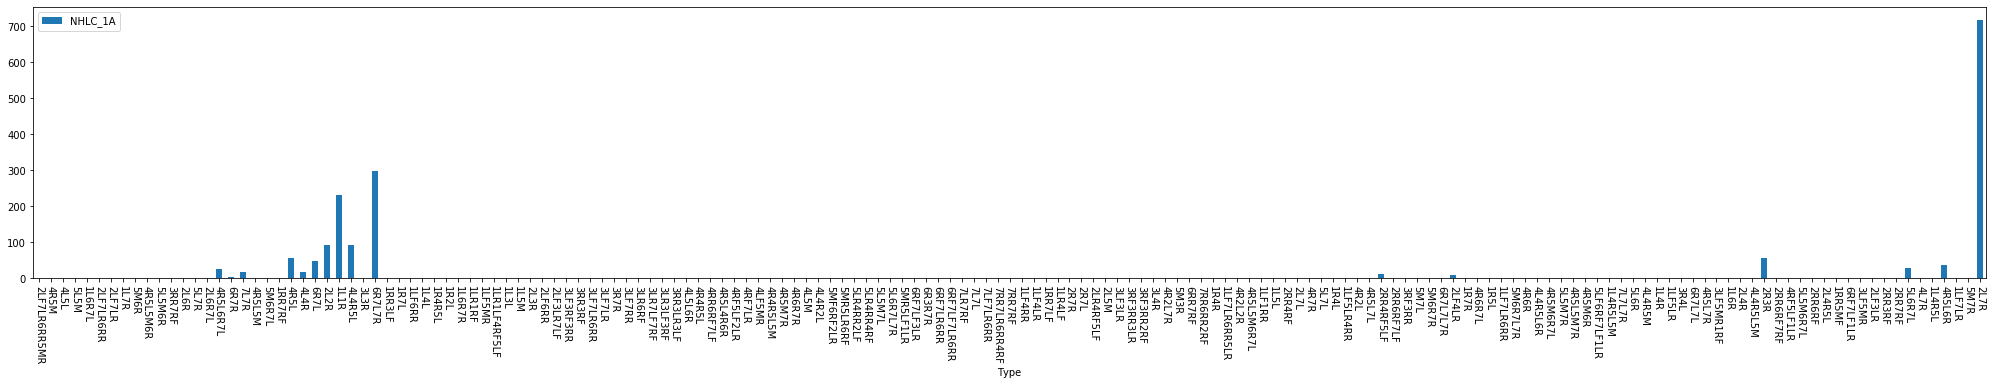

In [5]:
#df["NHLC_WT"].astype(int)
ax = df.plot.bar(y="NHLC_1A", figsize = (35,5), rot=-90)
#df=df.astype(int)
#print(df.dtypes)

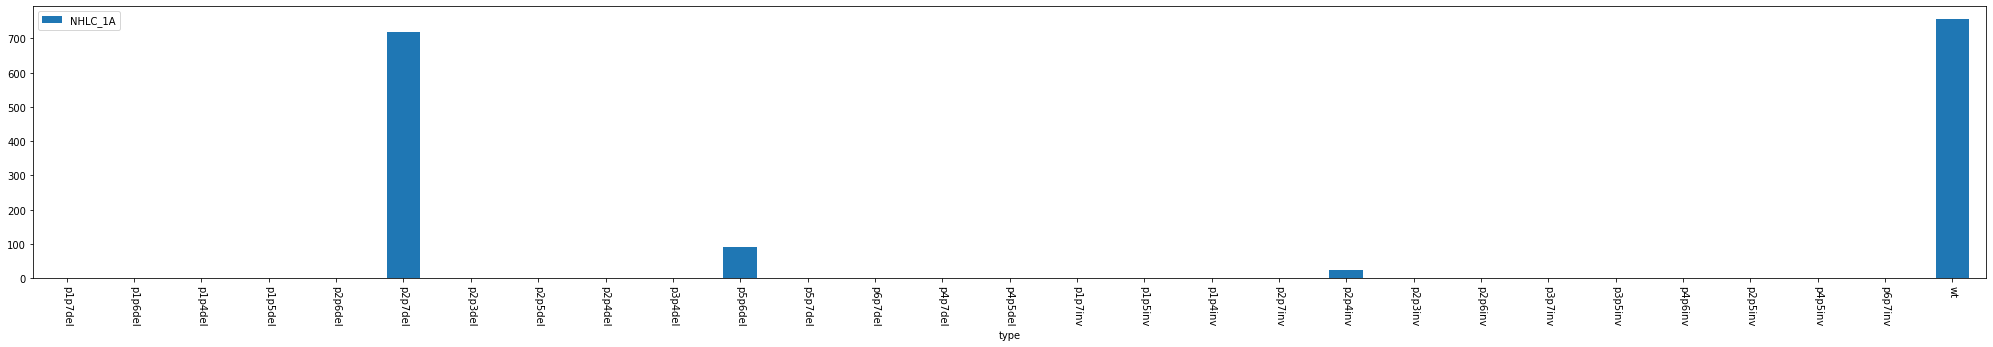

In [6]:
ax = df2.plot.bar(y="NHLC_1A", figsize = (35,5), rot=-90)

In [7]:
#adding one to every field for psuedocounting purposes
KLdf = df2
KLdf = KLdf.astype("float64")
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        KLdf.loc[key2][key] += 1
        
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        if KLdf.loc[key2][key] <= 0:
            print("error in",key2,key)

In [8]:
#Convert dataframes to frequencies of each column
for key, row in KLdf.iteritems():
    for key2, row2 in row.iteritems():
        value = KLdf.loc[key2][key]
        KLdf.loc[key2][key] = (value / sum(row))

In [9]:
# calculating KL distance between two distrubtions. Distance(P||Q) = summation[Pi*Log2(Pi/Qi)]

KLresults = {}
for key, row in KLdf.iteritems():
    for key2, row2 in KLdf.iteritems():
        if key == key2:
            continue
        data = row * np.log2(row/row2)
        resultkey = key + "-" + key2
        KLresults[resultkey] = sum(data)
        
        

In [10]:
resultframe = pd.DataFrame.from_dict(KLresults, orient = 'index', columns = ["KL_Distance"])

In [11]:
#Pulling values from the NHLC_16B samples:
print(resultframe[resultframe.index.str.contains("NHLC_16B-")])

                   KL_Distance
NHLC_16B-NHLC_WT      9.231185
NHLC_16B-NHLC_1A      8.250919
NHLC_16B-NHLC_1B      8.449011
NHLC_16B-NHLC_2A      9.412669
NHLC_16B-NHLC_2B      9.534836
NHLC_16B-NHLC_3A      9.037348
NHLC_16B-NHLC_3B      8.313250
NHLC_16B-NHLC_4B      9.522262
NHLC_16B-NHLC_4C      9.275238
NHLC_16B-NHLC_5A      8.759774
NHLC_16B-NHLC_5B      8.808842
NHLC_16B-NHLC_6A      8.853614
NHLC_16B-NHLC_6B      8.357291
NHLC_16B-NHLC_7A      9.082098
NHLC_16B-NHLC_7B      8.203893
NHLC_16B-NHLC_8A      9.027970
NHLC_16B-NHLC_8B      9.382457
NHLC_16B-NHLC_9A      9.493236
NHLC_16B-NHLC_9B      9.363718
NHLC_16B-NHLC_10A     9.024541
NHLC_16B-NHLC_10B     9.086329
NHLC_16B-NHLC_11A     9.166514
NHLC_16B-NHLC_11B     9.270596
NHLC_16B-NHLC_13A     6.952634
NHLC_16B-NHLC_13B     9.465226
NHLC_16B-NHLC_14A     9.329618
NHLC_16B-NHLC_14B     9.392799
NHLC_16B-NHLC_15D     9.483561
NHLC_16B-NHLC_16A     4.333650
NHLC_16B-NHLC_17A     9.030496
NHLC_16B-NHLC_17B     8.975384
NHLC_16B

,KL_Distance
NHLC_WT,0.031198
NHLC_1A,4.427305
NHLC_1B,3.907829
NHLC_2A,-0.012574
NHLC_2B,-0.013196
NHLC_3A,0.375171
NHLC_3B,0.300440
NHLC_4B,0.028368
NHLC_4C,0.154307
NHLC_5A,2.118634


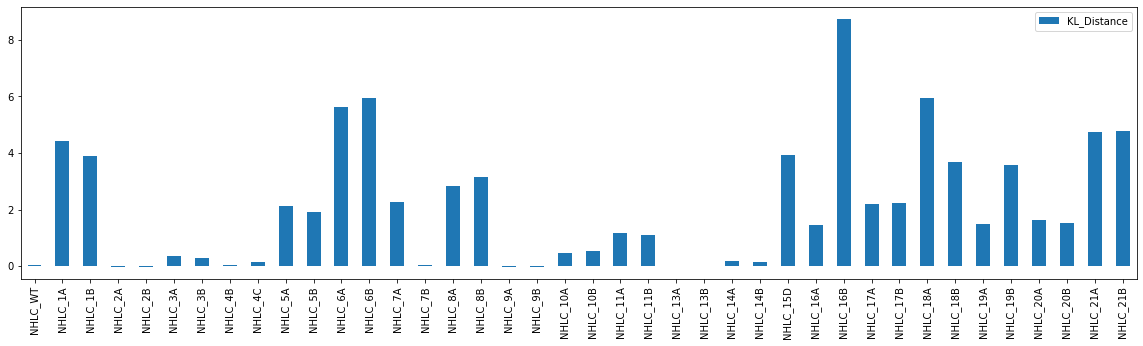

In [12]:
groups = {}
groupcount = {}
finalavg = {}
for key, row in resultframe.iteritems():
    for key2, row2 in row.iteritems():
        group = key2.split("-")[0]
        groups[group] = 0
        groupcount[group] = 0
    for key2, row2 in row.iteritems():
        group = key2.split("-")[0]
        groups[group] += row2
        groupcount[group] += 1

for key,value in groups.items():
    finalavg[key] = value/groupcount[key]

avgresults = pd.DataFrame.from_dict(finalavg, orient = 'index', columns = ["KL_Distance"])
display(avgresults)
ax = avgresults.plot.bar(y="KL_Distance", figsize = (20,5), rot=90)

In [13]:
print(skbio.diversity.get_alpha_diversity_metrics())
print(skbio.diversity.get_beta_diversity_metrics())

['ace', 'berger_parker_d', 'brillouin_d', 'chao1', 'chao1_ci', 'dominance', 'doubles', 'enspie', 'esty_ci', 'faith_pd', 'fisher_alpha', 'gini_index', 'goods_coverage', 'heip_e', 'kempton_taylor_q', 'lladser_ci', 'lladser_pe', 'margalef', 'mcintosh_d', 'mcintosh_e', 'menhinick', 'michaelis_menten_fit', 'observed_otus', 'osd', 'pielou_e', 'robbins', 'shannon', 'simpson', 'simpson_e', 'singles', 'strong']
['unweighted_unifrac', 'weighted_unifrac']


In [14]:
display(div)
div = div.drop("type", axis=1)
div = div.transpose()
display(div)

,type,NHLC_WT,NHLC_1A,NHLC_1B,NHLC_2A,NHLC_2B,NHLC_3A,NHLC_3B,NHLC_4B,NHLC_4C,...,NHLC_17A,NHLC_17B,NHLC_18A,NHLC_18B,NHLC_19A,NHLC_19B,NHLC_20A,NHLC_20B,NHLC_21A,NHLC_21B
0,p1p7del,4,0,0,0,0,0,2,0,0,...,0,19,1,0,0,0,0,3,0,2
1,p1p6del,2,0,0,0,0,0,0,0,0,...,0,2,2,0,0,0,0,0,3,0
2,p1p4del,0,0,0,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,p1p5del,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,p2p6del,10,0,0,0,0,0,0,0,2,...,0,0,2,0,0,0,418,400,175,194
5,p2p7del,0,719,748,1,1,0,0,0,0,...,2,0,855,0,0,0,2,0,2,0
6,p2p3del,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,p2p5del,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,p2p4del,0,0,0,0,0,0,0,0,0,...,205,202,1,0,0,0,0,0,0,0
9,p3p4del,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
NHLC_WT,4,2,0,0,10,0,0,0,0,0,...,0,0,0,10,0,0,0,0,0,2058
NHLC_1A,0,0,0,0,0,719,0,0,0,0,...,23,0,0,0,0,0,0,0,0,756
NHLC_1B,0,0,0,0,0,748,0,0,0,0,...,0,3,1,1,0,0,0,0,0,924
NHLC_2A,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2359
NHLC_2B,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2587
NHLC_3A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1708
NHLC_3B,2,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2026
NHLC_4B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2528
NHLC_4C,0,0,0,0,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,2079
NHLC_5A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1287


In [15]:
diversity_results= pd.DataFrame()
diversity_results["Observed_Otus"]=skbio.diversity.alpha_diversity("observed_otus",div, ids=div.index)
diversity_results["Simpsons_Index"]=skbio.diversity.alpha_diversity("simpson",div, ids=div.index)
diversity_results["Simspons_Evenness_Measure_E"]=skbio.diversity.alpha_diversity("simpson_e",div, ids=div.index)
diversity_results["Shannon_Entropy"]=skbio.diversity.alpha_diversity("shannon",div, ids=div.index)
diversity_results["Fisher_Alpha"]=skbio.diversity.alpha_diversity("fisher_alpha",div, ids=div.index)


In [16]:
display(diversity_results)
#diversity_results.plot(figsize = (40,5), rot=90)

,Observed_Otus,Simpsons_Index,Simspons_Evenness_Measure_E,Shannon_Entropy,Fisher_Alpha
NHLC_WT,9,0.042261,0.116014,0.207496,1.205683
NHLC_1A,5,0.565481,0.460279,1.357274,0.639526
NHLC_1B,8,0.548110,0.276616,1.284910,1.080467
NHLC_2A,2,0.000847,0.500424,0.005359,0.214966
NHLC_2B,3,0.001544,0.333849,0.009873,0.335103
NHLC_3A,3,0.197286,0.415258,0.507340,0.348199
NHLC_3B,6,0.177560,0.202649,0.496440,0.749473
NHLC_4B,3,0.053872,0.352313,0.185608,0.334924
NHLC_4C,5,0.119184,0.227062,0.355763,0.609736
NHLC_5A,3,0.417986,0.572724,1.020146,0.351905


In [17]:
#Convert reyni dataframes to frequencies of each column
reyni.set_index("type", inplace=True)
display(reyni)
reynisums=pd.Series(reyni.sum())
reynifreq = reyni / reynisums


,NHLC_WT,NHLC_1A,NHLC_1B,NHLC_2A,NHLC_2B,NHLC_3A,NHLC_3B,NHLC_4B,NHLC_4C,NHLC_5A,...,NHLC_17A,NHLC_17B,NHLC_18A,NHLC_18B,NHLC_19A,NHLC_19B,NHLC_20A,NHLC_20B,NHLC_21A,NHLC_21B
type,,,,,,,,,,,,,,,,,,,,,
p1p7del,4,0,0,0,0,0,2,0,0,0,...,0,19,1,0,0,0,0,3,0,2
p1p6del,2,0,0,0,0,0,0,0,0,0,...,0,2,2,0,0,0,0,0,3,0
p1p4del,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p1p5del,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
p2p6del,10,0,0,0,0,0,0,0,2,0,...,0,0,2,0,0,0,418,400,175,194
p2p7del,0,719,748,1,1,0,0,0,0,0,...,2,0,855,0,0,0,2,0,2,0
p2p3del,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p2p5del,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
p2p4del,0,0,0,0,0,0,0,0,0,0,...,205,202,1,0,0,0,0,0,0,0


In [18]:
alphalist = [0,.99999,2,3,4]
reyniresults={}
for column in reynifreq:
    #print(reynifreq[column])
    listresults=[]
    for alpha in alphalist:
        columnsum=0
        for row in reynifreq[column]:
            if row > 0:
                columnsum+=row**alpha
                #print(columnsum)
            else:
                continue
        columnsum=columnsum**(1/(1-alpha))
        listresults.append(columnsum)
    reyniresults[column]=listresults
display(reyniresults)

{'NHLC_WT': [9.0,
  1.1546865186897926,
  1.044125337281356,
  1.0329773024007303,
  1.0292602550473353],
 'NHLC_1A': [5.0,
  2.562011082788936,
  2.3013935487869683,
  2.2331512598794845,
  2.205857850196547],
 'NHLC_1B': [8.0,
  2.436673799943777,
  2.212928195132379,
  2.149591125989063,
  2.1182364247747403],
 'NHLC_2A': [2.0,
  1.0037215291202188,
  1.0008478167192045,
  1.0006359299976804,
  1.0005652511769014],
 'NHLC_2B': [3.0,
  1.0068670001230329,
  1.001546490877721,
  1.0011598684182093,
  1.0010309277951106],
 'NHLC_3A': [3.0,
  1.4214297336840434,
  1.2457733400985547,
  1.191638167787179,
  1.169548694790733],
 'NHLC_3B': [6.0,
  1.4107325492113878,
  1.2158946782330355,
  1.1665779846279496,
  1.1473001189067562],
 'NHLC_4B': [3.0,
  1.1372978568114425,
  1.0569393226144677,
  1.043012725094202,
  1.0381536002609375],
 'NHLC_4C': [5.0,
  1.279665106387212,
  1.1353102591651356,
  1.1032796279324064,
  1.091428400147301],
 'NHLC_5A': [3.0,
  2.0281285849221287,
  1.71817

In [19]:
'''
alpha = [0,.99999999999999,2,3,4]

reyniresults={}
for column in reynifreq:
    columnresults = []
    #print(column)
    for num in alpha:
        print("Alpha = ",num)
        #results = (sum(reynifreq[column] ** num)) ** (1/1-num)
        
        display(reynifreq[column]**num,reynifreq[column])
        #results = sum(reynifreq[column] ** num)
        #print("Diversity =", results)
        #columnresults.append(results)
    reyniresults[column]=columnresults
display(reyniresults)    
'''

'\nalpha = [0,.99999999999999,2,3,4]\n\nreyniresults={}\nfor column in reynifreq:\n    columnresults = []\n    #print(column)\n    for num in alpha:\n        print("Alpha = ",num)\n        #results = (sum(reynifreq[column] ** num)) ** (1/1-num)\n        \n        display(reynifreq[column]**num,reynifreq[column])\n        #results = sum(reynifreq[column] ** num)\n        #print("Diversity =", results)\n        #columnresults.append(results)\n    reyniresults[column]=columnresults\ndisplay(reyniresults)    \n'

In [20]:
display(reynifreq)

,NHLC_WT,NHLC_1A,NHLC_1B,NHLC_2A,NHLC_2B,NHLC_3A,NHLC_3B,NHLC_4B,NHLC_4C,NHLC_5A,...,NHLC_17A,NHLC_17B,NHLC_18A,NHLC_18B,NHLC_19A,NHLC_19B,NHLC_20A,NHLC_20B,NHLC_21A,NHLC_21B
type,,,,,,,,,,,,,,,,,,,,,
p1p7del,0.001902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000890,0.000000,0.000000,0.000000,...,0.000000,0.009043,0.000468,0.000000,0.000000,0.000000,0.000000,0.001541,0.000000,0.000929
p1p6del,0.000951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000952,0.000935,0.000000,0.000000,0.000000,0.000000,0.000000,0.001384,0.000000
p1p4del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002226,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
p1p5del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000461,0.000000
p2p6del,0.004755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000901,0.000000,...,0.000000,0.000000,0.000935,0.000000,0.000000,0.000000,0.216580,0.205444,0.080720,0.090107
p2p7del,0.000000,0.452486,0.421646,0.000424,0.000386,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000923,0.000000,0.399906,0.000000,0.000000,0.000000,0.001036,0.000000,0.000923,0.000000
p2p3del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
p2p5del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
p2p4del,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.094645,0.096145,0.000468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
reynidf = pd.DataFrame.from_dict(data=reyniresults, orient='columns')
reynidfl = pd.DataFrame.from_dict(data=reyniresults, orient='index', columns=alphalist)
display(reynidfl)

,0.00000,0.99999,2.00000,3.00000,4.00000
NHLC_WT,9.0,1.154687,1.044125,1.032977,1.029260
NHLC_1A,5.0,2.562011,2.301394,2.233151,2.205858
NHLC_1B,8.0,2.436674,2.212928,2.149591,2.118236
NHLC_2A,2.0,1.003722,1.000848,1.000636,1.000565
NHLC_2B,3.0,1.006867,1.001546,1.001160,1.001031
NHLC_3A,3.0,1.421430,1.245773,1.191638,1.169549
NHLC_3B,6.0,1.410733,1.215895,1.166578,1.147300
NHLC_4B,3.0,1.137298,1.056939,1.043013,1.038154
NHLC_4C,5.0,1.279665,1.135310,1.103280,1.091428
NHLC_5A,3.0,2.028129,1.718171,1.591441,1.527693


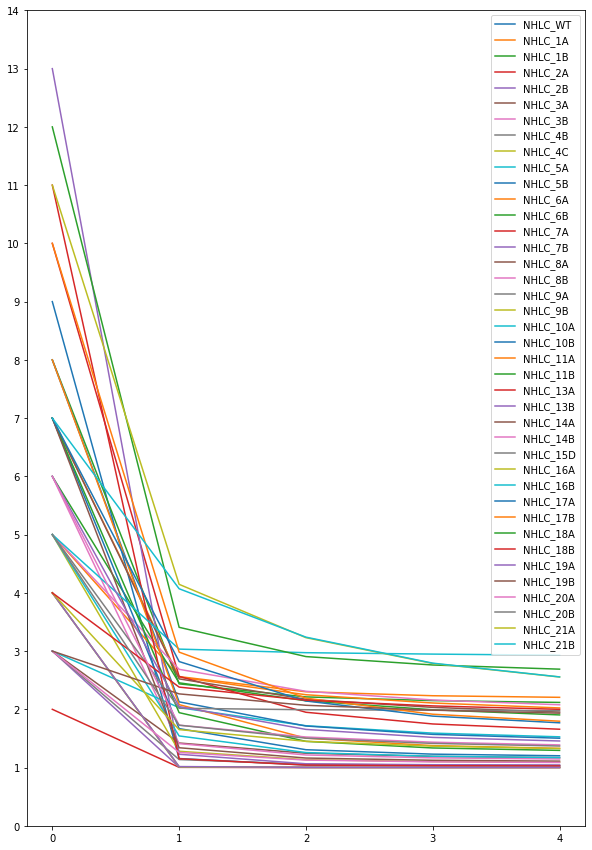

In [23]:
ax = reynidf.plot(figsize = (10,15), xticks=(0,1,2,3,4),yticks=(range(0,15)))
ax.figure.savefig('figure.png')